In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Picking random samples

df = pd.read_csv('/content/drive/My Drive/sales.csv')
df_modified = df.sample(1000,random_state=42)
df_modified.head(5)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
6252,Control,Low Value,202.937510,245.562529,69.112754,76.000000,Yes
4684,Treatment,Medium Value,124.808089,205.601701,52.890804,69.813121,Yes
1731,Control,NaN,NaN,133.337069,69.575004,60.940449,No
4742,NaN,NaN,261.604426,419.422090,82.913483,NaN,Yes
4521,Control,Low Value,NaN,160.140266,62.189051,NaN,Yes


In [ ]:
df_modified.shape[0]

1000

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Group,8599,2,Control,4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Segment,8034,3,Low Value,2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Before,8478.0,NaN,NaN,NaN,203.716998,55.273059,24.852966,166.629232,203.323607,238.809147,545.422547
Sales_After,9233.0,NaN,NaN,NaN,280.457952,85.659543,32.414352,221.43699,273.12917,332.570108,818.219997
Customer_Satisfaction_Before,8330.0,NaN,NaN,NaN,70.252076,16.95701,22.202441,56.365513,69.490898,83.426798,100.0
Customer_Satisfaction_After,8360.0,NaN,NaN,NaN,73.872593,18.128351,18.224938,59.92503,73.844594,90.044365,100.0
Purchase_Made,9195,2,Yes,4667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [ ]:
df_modified.isnull().sum()

,0
Group,131
Customer_Segment,203
Sales_Before,153
Sales_After,84
Customer_Satisfaction_Before,181
Customer_Satisfaction_After,155
Purchase_Made,80


In [ ]:
df_modified.duplicated().sum()

0

In [ ]:
#To perform univariate Anlalysis plotting a histogram and boxplot

def labelled_bar(df,feature,kde=False):

  f,(ax1,ax2)= plt.subplots(figsize=(15,5),
                            nrows=2,
                            sharex=True,
                            gridspec_kw={'height_ratios':(0.25,0.75)})

  if (kde==True):
   sns.histplot(df,
                x=feature,
                ax=ax1,
                kde=kde)
  else:
   sns.histplot(df,
                x=feature,
                ax=ax1)
  ax1.axvline(df[feature].mean(),color='green',linestyle='--')
  ax1.axvline(df[feature].median(),color='red',linestyle='-')
  sns.boxplot(df,
              x=feature,
              ax=ax2)
  plt.show()

# Exploratory Data Analysis

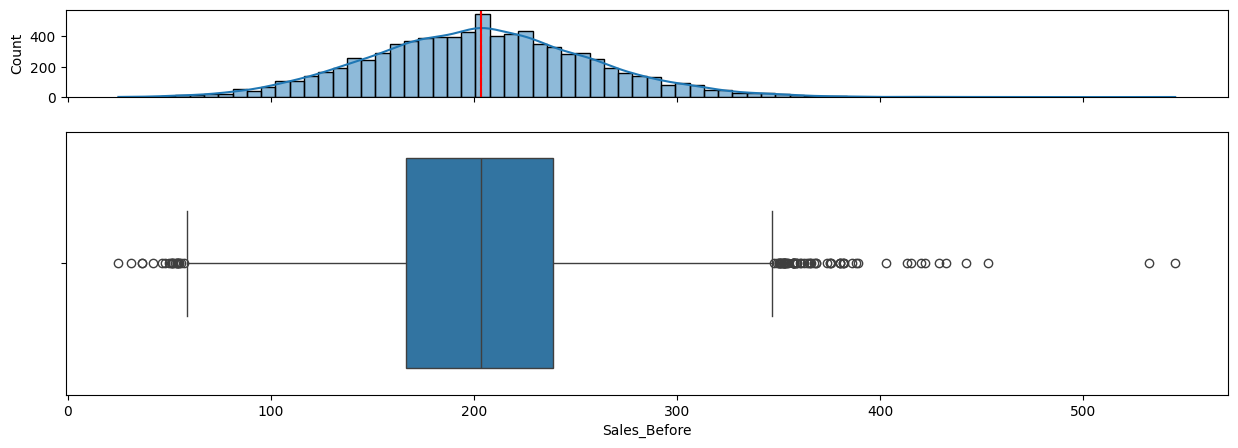

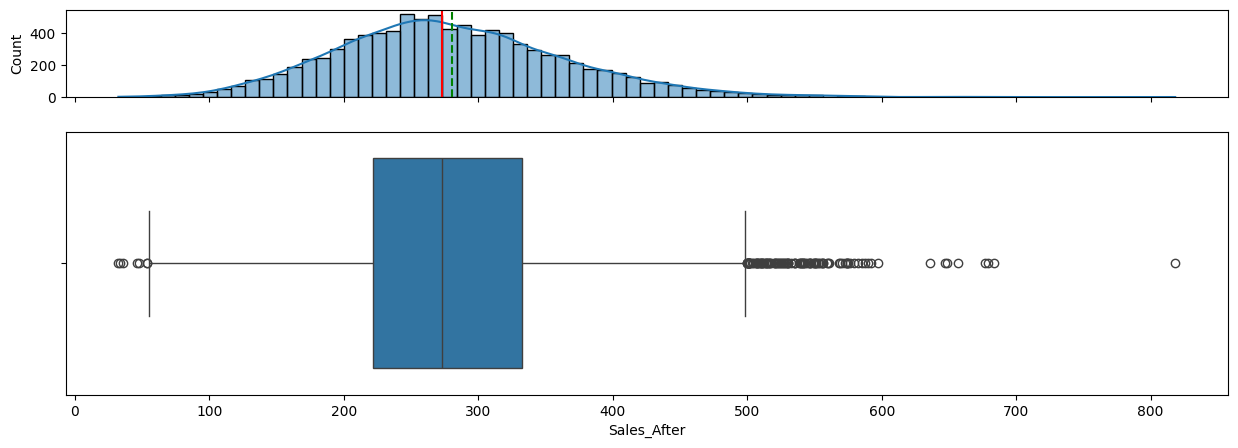

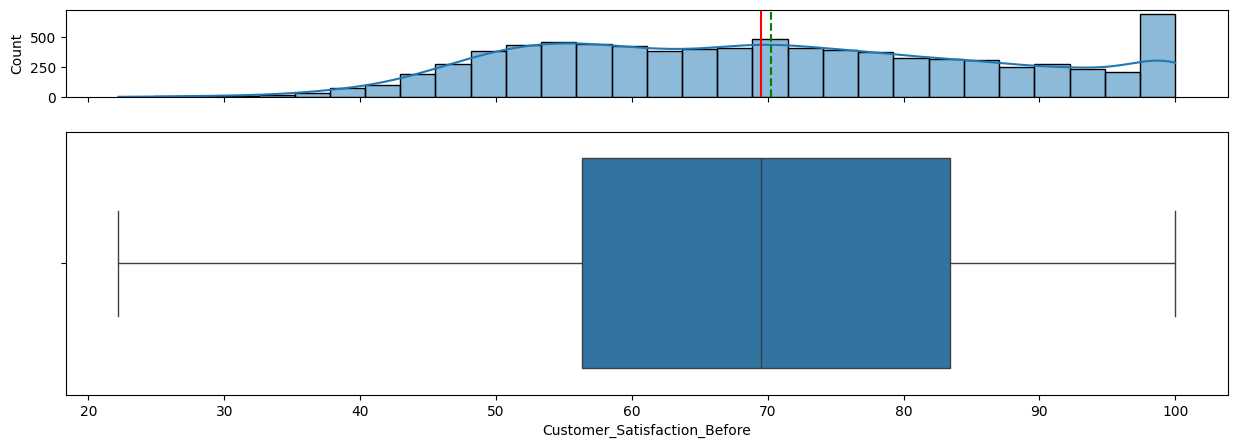

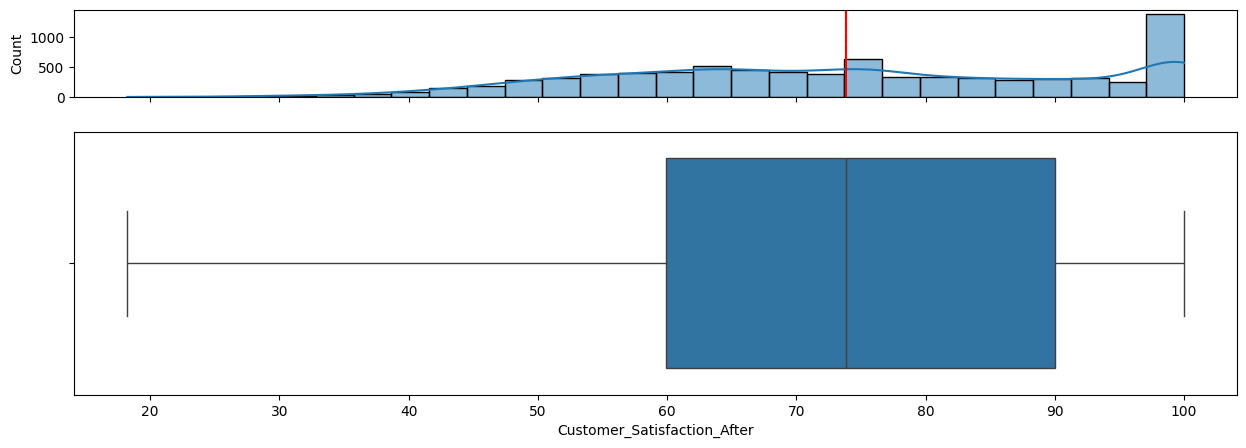

In [ ]:
for i in (df_modified.select_dtypes(include=np.number).columns.to_list()):

 labelled_bar(df,i,kde=True)


#labelled_bar()

## Multi Variate Analysis

<Axes: >

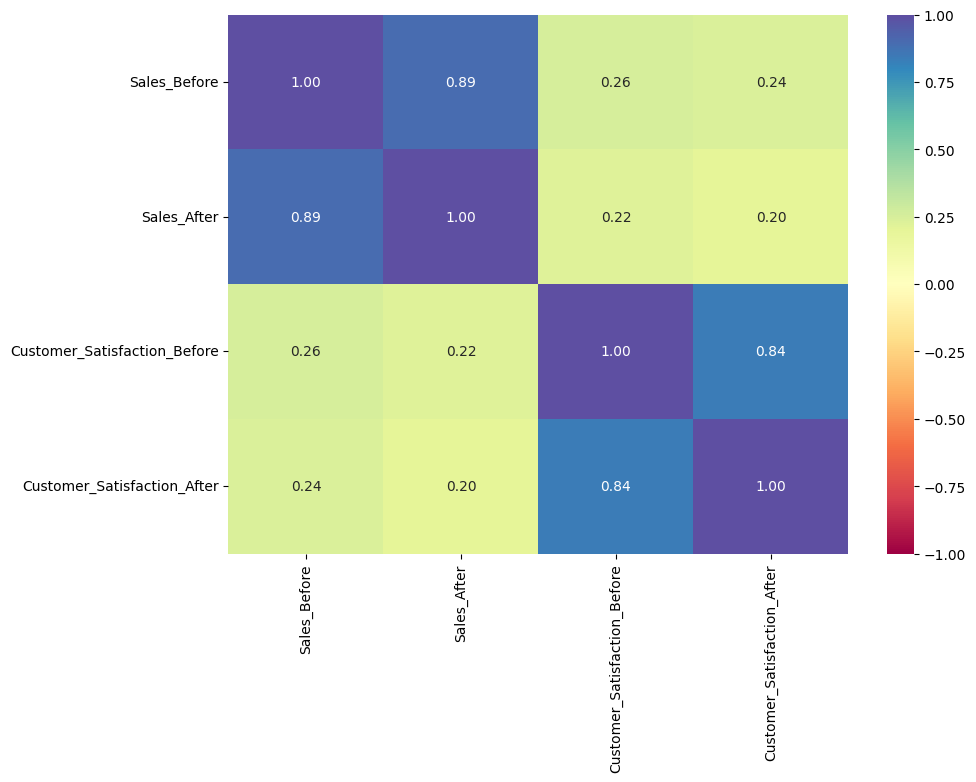

In [ ]:

var = df.select_dtypes(include=np.number).columns.to_list()

plt.figure(figsize=(10,7))
sns.heatmap(
    df[var].corr(),
    annot=True,
    cmap='Spectral',
    vmin=-1,
    vmax=1,
    cbar=True,
    fmt='.2f'
)

We observe that customer satisfaction before and customer satisfaction After has high positive corealtion



# Data Preprocessing

In [ ]:


df_modified['Customer_Satisfaction_Before'] =df_modified['Customer_Satisfaction_Before'].replace(np.NaN,df_modified['Customer_Satisfaction_Before'].mean())
df_modified['Sales_After'] =df_modified['Customer_Satisfaction_Before'].replace(np.NaN,df_modified['Sales_After'].mean())

From univariate Anlaysis we oberve that the distribution is normal and we impute the missing values in numerical fields with respective mean values.

In [ ]:
df_modified['Sales_Before'] =df_modified['Sales_Before'].replace(np.NaN,df_modified['Sales_Before'].mean())
df_modified['Customer_Satisfaction_After'] =df_modified['Customer_Satisfaction_After'].replace(np.NaN,df_modified['Customer_Satisfaction_After'].mean())

There are certain values in categorical columns.
We will use 'others' category to separate them

In [ ]:
df_modified['Group'] = df['Group'].replace(np.NaN,'Others')

In [ ]:
df_modified['Customer_Segment']  = df['Customer_Segment'].replace(np.NaN,'Others')

In [ ]:
df_modified['Purchase_Made'] = df['Purchase_Made'].replace(np.NaN,'Others')

In [ ]:
#Let us check if there are null values after imputation
df_modified.isnull().sum()

,0
Group,0
Customer_Segment,0
Sales_Before,0
Sales_After,0
Customer_Satisfaction_Before,0
Customer_Satisfaction_After,0
Purchase_Made,0


After Imputation we do not see any null values.

# Chi-Square Test

Null Hypothesis : Variables are independent of each other

Alternate Hypothesis : Variables are not independent of each other

**Test Static**:
we choose chi-test to perform statistical testing.

**Significance Level** :
We choose 0.05 as alpha value

**Assumptions**:
We are comparing if two categorical variables are related to each other

The number of occurences in each level is greater than 10 and by central limit

theorem we can conclude that distribution is normal.

In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_modified[df_modified['Group']!='Others']['Group'],
                    df_modified[df_modified['Purchase_Made']!='Others']['Purchase_Made'])
print(table)

chi2,p_value,dof,expected=chi2_contingency(table)
print(chi2)
print(p_value)
print(dof)
print(expected)

if (p_value<0.05):
  print('Reject Null Hypothesis - Variables are not independent')
else:
  print('Do not reject Null Hypothesis - Variables are independent')

Purchase_Made   No  Yes
Group                  
Control        195  209
Treatment      187  210
0.06710384304318573
0.7956012186085542
1
[[192.66916355 211.33083645]
 [189.33083645 207.66916355]]
Do not reject Null Hypothesis - Variables are independent


# Independent Sample T-test

Null Hypothesis : Mean Sales_Before in control group is equal to than Mean Sales_Before in treatment group

Alternate Hypothesis : Mean Sales_Before in control group is not equal to Mean Sales_Before in treatment group

**Test Static**:
we choose t-test independent samples to perform statistical testing.

**Significance Level** :
We choose 0.05 as alpha value

**Assumptions**:
We are comparing 2 independent populations.

The number of occurences in each level is greater than 10 and by central limit theorem we come to conclusion the distribution is normal


In [ ]:
#Preparing the data
from scipy.stats import ttest_ind

control = df_modified[df_modified['Group']=='Control']['Sales_Before']
treatment = df_modified[df_modified['Group']=='Treatment']['Sales_Before']

print('Mean Value of sales in Control group - ',"{0:.3f}".format(control.mean()))
print('Mean Value of sales in Treatment group - ',"{0:.3f}".format(treatment.mean()))

test_static,p_value = ttest_ind(control,treatment,equal_var=True)
print(test_static,p_value)

Mean Value of sales in Control group -  204.749
Mean Value of sales in Treatment group -  207.037
-0.6830273606917467 0.4947720233678268


In [ ]:
if (p_value<0.05):
  print('Reject Null Hypothesis - Mean Sales_Before in control group is not equal to than Mean Sales_Before in treatment group')
else:
  print('Do not reject Null Hypothesis - Mean Sales_Before in control group is equal to than Mean Sales_Before in treatment group')

Do not reject Null Hypothesis - Mean Sales_Before in control group is equal to than Mean Sales_Before in treatment group


# Co-Relation Test

It is used to check strength and direction of the linear relationship between two continuous varaibles.

Null Hypothesis : Sales_Before and Customer_Satisfaction_Before are corelated

Alternate Hypothesis : Sales_Before and Customer_Satisfaction_Before are
 not  corelated

**Test Static**:
we choose pearsonr/spearmanr independent samples to perform statistical testing.

**Significance Level** :
We choose 0.05 as alpha value

**Assumptions**:
We are comparing 2 independent populations.

The number of occurences in each level is greater than 10 and by central limit theorem we come to conclusion the distribution is norma

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro

sales_before = df_modified['Sales_Before']
customer_satisfaction_before = df_modified['Customer_Satisfaction_Before']

shapiro_test_before,p_value_sales = shapiro(sales_before)
print("{0:.4f}".format(shapiro_test_before))

shapiro_test_customer,p_value_customer = shapiro(customer_satisfaction_before)
print("{0:.4f}".format(shapiro_test_customer))

if (p_value_sales<0.05):
  print('Data is not normally distributed - sales before')
else:
  print('Data is normally distributed - sales before')

if (p_value_customer<0.05):
  print('Data is not normally distributed - Customer_Satisfaction_Before')
else:
  print('Data is normally distributed - Customer_Satisfaction_Before')

if (p_value_sales > 0.05) and (p_value_customer > 0.05):
  corr_pearson,p_value = pearsonr(sales_before,customer_satisfaction_before)
  test_performed = 'pearson'
  print(test_performed,corr_pearson,p_value)
else:
  corr_spearman,p_value = spearmanr(sales_before,customer_satisfaction_before)
  test_performed = 'spearman'
  print('\n Test Performed - ',(test_performed),'\n Co-relation - ',"{0:.4f}".format(corr_spearman),'\n p_value_spearmanr - ',"{0:.4f}".format(p_value))

0.9846
0.9724
Data is not normally distributed - sales before
Data is not normally distributed - Customer_Satisfaction_Before

 Test Performed -  spearman 
 Co-relation -  0.1935 
 p_value_spearmanr -  0.0000


##Draw Infrence from Test:

In [ ]:
if (p_value<0.05):
  print('Reject Null Hypothesis - There is a corelation between Sales_Before and Customer_Satisfaction_Before')
else:
  print('Do not reject Null Hypothesis - There is no corelation between Sales_Before and Customer_Satisfaction_Before')

Reject Null Hypothesis - There is a corelation between Sales_Before and Customer_Satisfaction_Before


##ScatterPlot to look at the relation

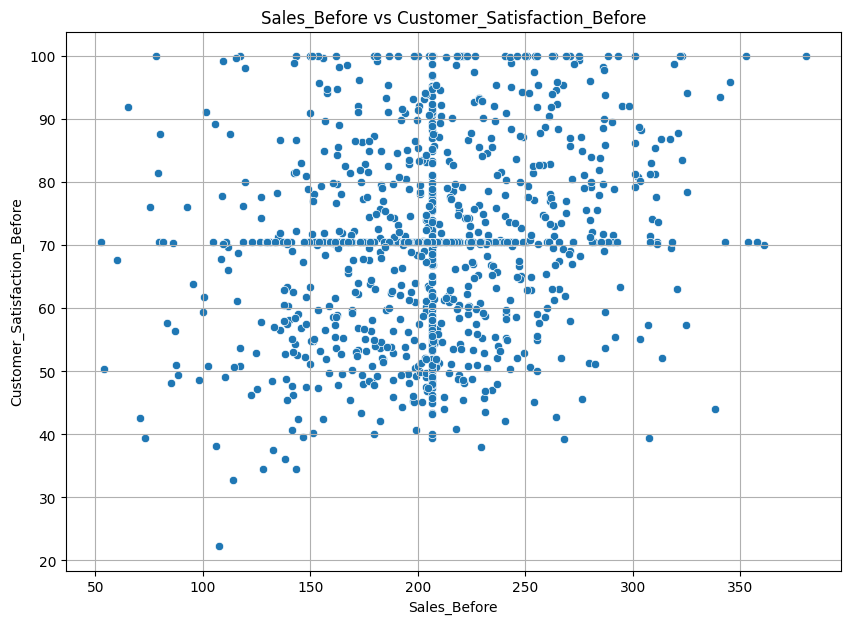

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Sales_Before vs Customer_Satisfaction_Before')
sns.scatterplot(x=sales_before,y=customer_satisfaction_before)
plt.xlabel('Sales_Before')
plt.ylabel('Customer_Satisfaction_Before')
plt.grid(True)
plt.show()